# Visualization For Hybrid Sort and Baseline Sort Algorithms
Eric Juarez<br>CS 253

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Process Data

In [2]:
path = "data/ratio"
files = ["0x00","0x25","0x50","0x75","1x00"]
ext = ".tsv"
df_list = []

for file in files:
    df = pd.read_csv(path + file + ext, sep='\t')
    df["DIFF %"] *= -100
    df = df.pivot(index="ROW", columns="COL", values="DIFF %")
    df_list.append(df)

In [3]:
df_list[0].head()

COL,200,400,600,800,1000
ROW,,,,,
200,44.447940,44.361014,44.046940,39.932723,42.222572
400,39.435606,37.207068,37.696069,34.647430,33.332673
600,36.198672,32.759526,30.213853,28.546435,31.528251
800,32.578387,30.419101,26.745635,29.381435,31.383712
1000,34.106698,27.429001,29.324119,29.274242,30.006256


### Data Visualization

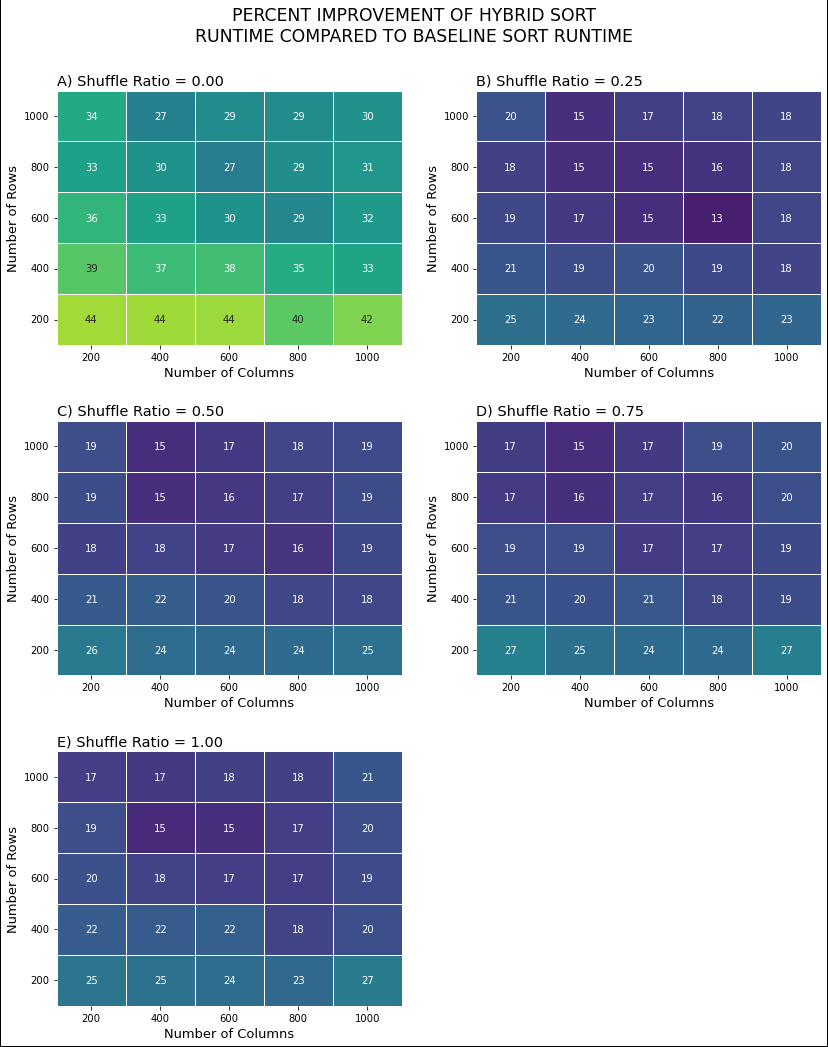

In [4]:
ROWS = 3
COLS = 2
index = 0
ratios = ["0.00","0.25","0.50","0.75","1.00"]
cases = ['A','B','C','D','E']
fig, axs = plt.subplots(nrows=ROWS, ncols=COLS)
for r in range(ROWS):
    for c in range(COLS):
        ax = sns.heatmap(
            df_list[index], annot=True, linewidth=0.5, 
            vmin=10, vmax=50, cbar = False, cmap="viridis", 
            ax=axs[r][c]
        )
        ax.invert_yaxis()
        ax.set_title(cases[index] + ") Shuffle Ratio = " + ratios[index], fontsize=14.5, loc="left")
        ax.set_xlabel("Number of Columns", fontsize=13)
        ax.set_ylabel("Number of Rows", fontsize=13)
        if index < 4: index += 1
fig.delaxes(axs[2][1])
fig.set_size_inches(12,15)
#fig.suptitle("PERCENT IMPROVEMENT OF HYBRID SORT\nRUNTIME COMPARED TO BASELINE SORT RUNTIME", fontsize="xx-large")
fig.set_facecolor("white")
fig.tight_layout(pad=2.5)
fig.set_linewidth(2)
fig.set_edgecolor("black")

fig.savefig("sort_data_heatmaps.png", dpi=300, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())